In [1]:
import numpy as np
import matplotlib.pyplot as plt
rng = np.random.default_rng()
from sklearn.decomposition import PCA

import imp

from ikd import utils, core, evaluate, datasets
imp.reload(utils)
imp.reload(core)
imp.reload(evaluate)
imp.reload(datasets)

# from ipywidgets import interact
# import ipywidgets as widgets

<module 'ikd.datasets' from '/storage/scratch1/1/cli726/ikd/ikd/ikd/datasets.py'>

In [2]:
d_latent = 3 # latent dimensionality
dataset = 0
n_points = 100 # number of observations T
d_observation = 1000 # observation dimensionality
kernel = ["squared exponential", "rational quadratic", "gamma-exponential", "matern"][0]
extra_kernel_hyperparam = [None, 1, 1, 3/2][0]
variance = 1
length_scale = 0.5

z_true = datasets.generate_latent(d_latent, dataset, n_points=n_points, show=False)
cov_true = utils.kernel_cov_generator(z_true, kernel=kernel, variance=variance, length_scale=length_scale, extra_kernel_hyperparam=extra_kernel_hyperparam) # K, true kernel covariance matrix

Clique threshold: 0.1, number of cliques: 195


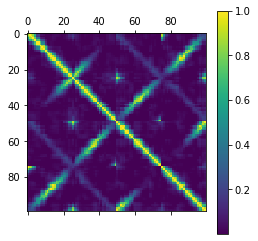

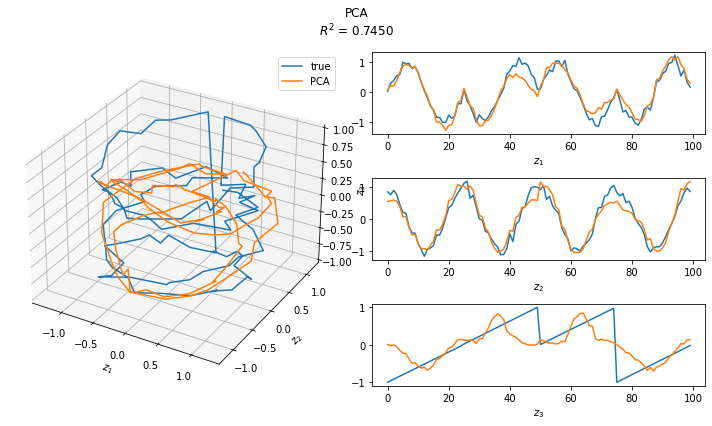

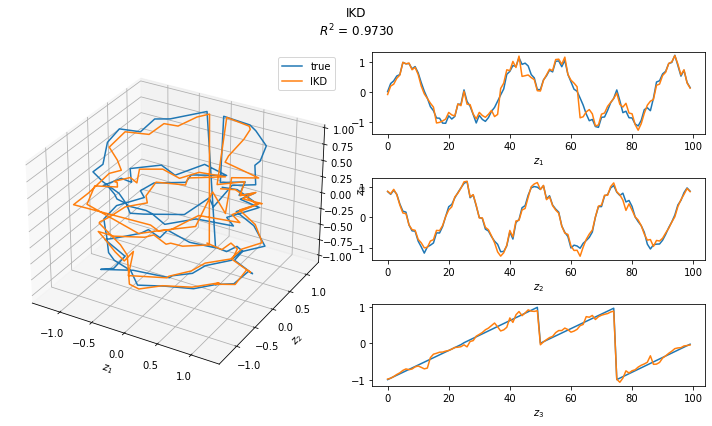

In [5]:
seed = 2
x = datasets.gaussian_process_generator(cov_true, d_observation, seed)
cov_samp_th = utils.filt_cov_samp(np.cov(x), variance=variance)
plt.matshow(cov_samp_th)
plt.colorbar()

z_pca = PCA(n_components=d_latent).fit_transform(x)
z_ikd = core.ikd_blockwise(cov_samp_th, d_latent, kernel=kernel, variance=variance, extra_kernel_hyperparam=extra_kernel_hyperparam, clique_th_or_d_observation=d_observation, z_ref=z_pca)

evaluate.compare_latents(z_true, utils.align(z_true, z_pca), 'PCA')
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd), 'IKD')

Only one clique, identical to full eigen-decomposition


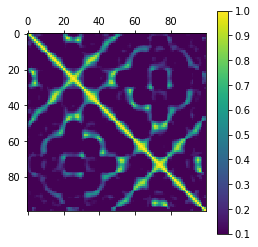

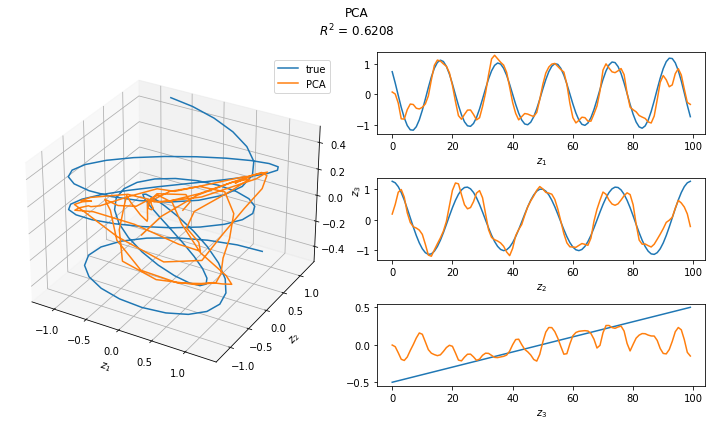

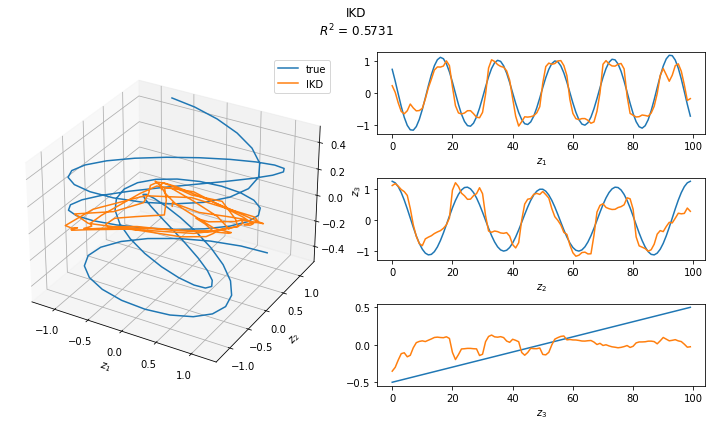

In [19]:
d_latent = 3 # latent dimensionality
dataset = 1
n_points = 100 # number of observations T
d_observation = 100 # observation dimensionality
kernel = ["squared exponential", "rational quadratic", "gamma-exponential", "matern"][0]
extra_kernel_hyperparam = [None, 1, 1, 3/2][0]
variance = 1
length_scale = 0.5

z_true = datasets.generate_latent(d_latent, dataset, n_points=n_points, show=False)
cov_true = utils.kernel_cov_generator(z_true, kernel=kernel, variance=variance, length_scale=length_scale, extra_kernel_hyperparam=extra_kernel_hyperparam) # K, true kernel covariance matrix

seed = 1
x = datasets.gaussian_process_generator(cov_true, d_observation, seed)
# cov_samp_th = utils.filt_cov_samp(np.cov(x), variance=variance)
cov_samp = np.corrcoef(x)
cov_samp_th = cov_samp.copy()
cov_samp_th[cov_samp_th <= 1e-3] = 1e-3
plt.matshow(cov_samp_th)
plt.colorbar()

z_pca = PCA(n_components=d_latent).fit_transform(x)
z_ikd = core.ikd_blockwise(cov_samp_th, d_latent, kernel=kernel, variance=variance, extra_kernel_hyperparam=extra_kernel_hyperparam, clique_th_or_d_observation=d_observation, max_n_cliques=2)

evaluate.compare_latents(z_true, utils.align(z_true, z_pca), 'PCA')
evaluate.compare_latents(z_true, utils.align(z_true, z_ikd), 'IKD')

In [63]:
import networkx as nx

In [109]:
G = nx.from_numpy_matrix(cov_samp_th > 0.3)

In [ ]:
nx.algorithms.cliques_containing_node(G, 1)

In [ ]:
nx.approximation.max_clique(G)

In [140]:
len(list(nx.algorithms.find_cliques_recursive(G)))

1804

In [114]:
len(list(nx.algorithms.find_cliques(G, [0])))

415